<a href="https://colab.research.google.com/github/albertos-2002/SF3/blob/main/elettronica/esperienza_5/Esperienza_5_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

regrlin_pear_errpost_xys(input_x, input_y, input_sigma)

retta_fit_xba(x, b,a)

chi_quadro_lineare(y_vec, x_vec, sigma_vec, inte, pend, stringa_ytitle, stringa_xtitle, stringa_titolo)

#Dati


Valori misurati delle componenti:

$R_1 = 8.171 \ \  K\Omega, \ \ \ fondo \ scala \ 10 \ K\Omega$

$R_3 = 8.172 \ \  K\Omega, \ \ \ fondo \ scala \ 10 \ K\Omega$

$R_f = 14.975 \ \  K\Omega, \ \ \ fondo \ scala \ 100 \ K\Omega$

$R_4 = 14.985 \ \  K\Omega, \ \ \ fondo \ scala \ 100 \ K\Omega$

Oscilloscopio numero 17

In [5]:
R_1 = 8.171*1000  #kohm
R_3 = 8.172*1000  #kohm
R_f = 14.975*1000 #kohm
R_4 = 14.985*1000 #kohm
err_R_1 = math.sqrt(1/3)* math.sqrt( (0.07*R_1/100)**2 + (8)**2 )                                   #ipotesi uniforme
err_R_f = math.sqrt(1/3)* math.sqrt( (0.07*R_f/100)**2 + (8)**2 )
err_R_4 = math.sqrt(1/3)* math.sqrt( (0.07*R_4/100)**2 + (8)**2 )
err_R_3 = math.sqrt(1/3)* math.sqrt( (0.07*R_3/100)**2 + (8)**2 )

print("err R1 [ohm]\n", err_R_1)
print("err Rf [ohm]\n", err_R_f)
print("err R4 [ohm]\n", err_R_4)
print("err R3 [ohm]\n", err_R_3)

err R1 [ohm]
 5.677880123485055
err Rf [ohm]
 7.613207958322606
err R4 [ohm]
 7.616421081015238
err R3 [ohm]
 5.67811518493006




---



In [6]:
#dati verifica non invertente
#misura di A2

f_ni = 1 #khz seno
v_in_ni = [0.168, 0.468, 0.808, 1.1, 1.4, 1.7, 2.02]
v_out_ni = [0.113, 0.3, 0.528, 0.72, 0.92, 1.12, 1.31]
v_in_div_ni = [0.05, 0.1, 0.2, 0.2, 0.2, 0.5, 0.5]
v_out_div_ni = [0.02, 0.05, 0.1, 0.1, 0.2, 0.2, 0.2]

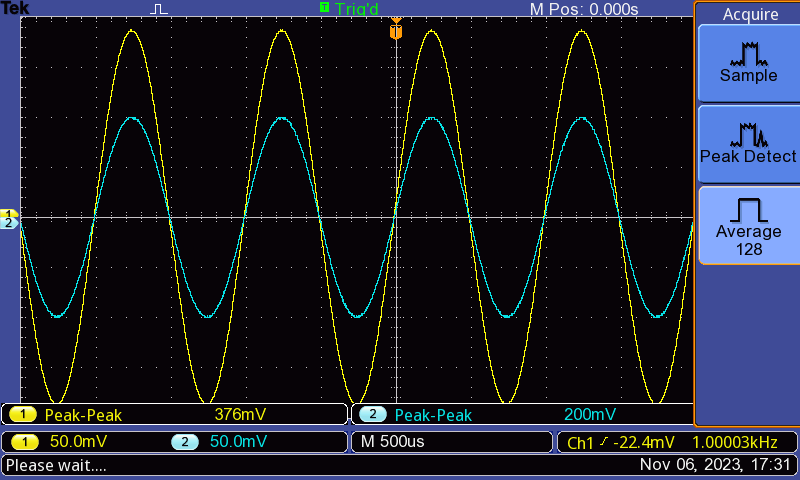


In [7]:
#dati versione2 verifica non invertente

v_in_ni = [0.2, 0.504, 0.804, 1.1, 1.41, 1.72, 2.02]
v_out_ni = [0.376, 0.936, 1.5, 2.06, 2.62, 3.16,3.7 ]
v_in_div_ni = [0.05, 0.1, 0.1, 0.2, 0.2, 0.5, 0.5]
v_out_div_ni = [0.05, 0.2, 0.2, 0.5, 0.5, 0.5, 0.5]



---



In [8]:
#dati amplificatore alle differenze

#onda sinusoidale in v2
ampiezza_d_2 = 1 #v_pp
f_d_2 = 200 #hz

#onda quadra in v1
ampiezza_d_1 = 2 #v_pp // abbassare a 1V nel caso di saturazione
f_d_1 = 50 #hz



cosa fare per la cella sopra

- Verificare quindi il funzionamento come amplificatore delle differenze: impostare l’onda
sinusoidale con ampiezza $1 V_{PP}$ e frequenza $200 Hz$ in $V_2$. Collegare l’altro canale del
generatore a $V_1$ e impostare un’onda quadra di ampiezza $2 V_{PP}$ (ev. abbassare a $1V$ se
andasse in saturazione) e frequenza $50 Hz$.
- Misurare gli input ($V_1$ e $V_2$) e l’output ($V_{out}$) nei punti di interesse per verificare la corretta
risposta del circuito, confrontando i dati raccolti con la simulazione e le previsioni teoriche.

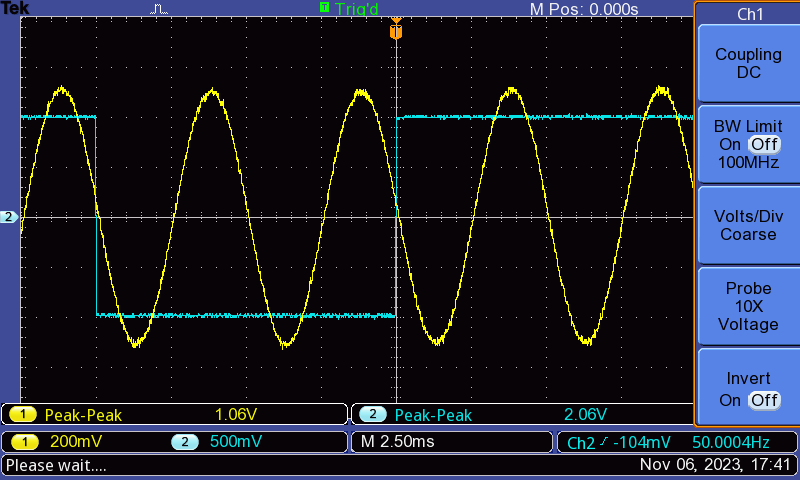

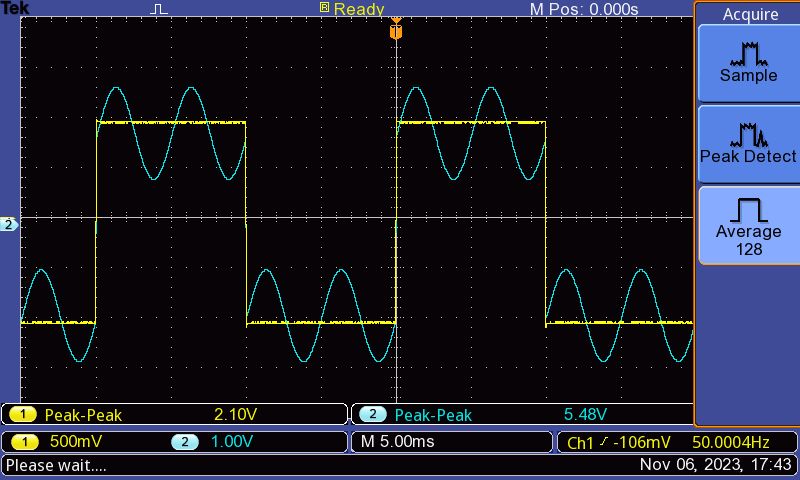



---



In [9]:
#dati amplificazione di modo comune Ac
#stesso segnale sinusoidale in V1 e V2

frequenza_ac = 500 #[hz] seno
v_in_ac = [ 0.416, 0.620, 0.8, 0.97, 1.2, 1.41, 1.6]
v_out_ac = [ 0.12, 0.175, 0.236, 0.29, 0.35, 0.42, 0.47]
v_in_div_ac = [ 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
v_out_div_ac = [ 0.05, 0.05, 0.05, 0.05, 0.05, 0.1, 0.1]

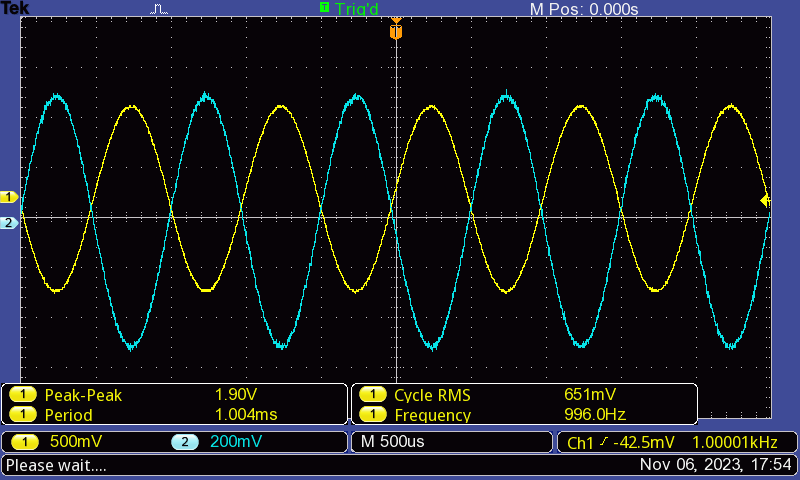



---



In [10]:
#dati amplificatore differenziale Ad
#misura di A1
#questa è la misura del punto 1 però con V2 a massa e segnale in V1

frequenza_ad = 1 #[khz] seno
v_in_ad = [ 0.20, 0.508, 0.804, 1.1, 1.4, 1.7, 2.02]
v_out_ad = [ 0.37, 0.92, 1.48, 2.02, 2.58, 3.14, 3.66]
v_in_div_ad = [ 0.05, 0.1, 0.1, 0.2, 0.2, 0.2, 0.5]
v_out_div_ad = [ 0.05, 0.2, 0.2, 0.5, 0.5, 0.5, 0.5]

#Analisi

**Verifica configurazione non invertente**

(Misura di $A_2$)

Se analizziamo il circuito dal punto di vista teorico, notiamo comprende anche un partitore di tensione, di conseguenza ne va tenuto conto nel calcolo dell'alplificazione teorica prevista

Dopo vari passaggi algebrici otteniamo la seguente espressione per l'amplificazione teorica

$A_t = (\frac{R_4}{R_4 + R_3})(1+\frac{R_f}{R_1})$

o in modo equivalente

$A_t = \frac{1 + \frac{R_f}{R_1}}{1 + \frac{R_3}{R_4}}$

Come indicato nelle schede delle esperienze ci aspettiamo che questo valore conincida numericamente con quello di $A_1$

Analisi corretta con presa dati Versione 2

In [11]:
#calcolo del guadagno teorico
g_teorico = (R_4 / (R_4+R_3))*(1+(R_f/R_1))

err_gteorico = g_teorico * math.sqrt(  (err_R_4 / R_4)**2 + ( ((err_R_3)**2 + (err_R_4)**2) / (R_3 + R_4)**2 )  +  ( ((err_R_1)**2 + (err_R_f)**2) / (R_1 + R_f)**2 ) + (err_R_1 / R_1)**2  )
#propagazione di una uniforme

print(g_teorico, " \pm ", err_gteorico)

1.8330537082340677  \pm  0.0019030811587491705


In [12]:
#@title calcolo degli errori
err_v_in_ni = []
err_v_out_ni = []
for i in range(len(v_out_ni)):
  dummy = 0
  dummy = math.sqrt(1/3)* math.sqrt( ((1/10)*v_out_div_ni[i])**2 + ((3/100)*v_out_ni[i])**2)        #ipotesi uniforme
  err_v_out_ni.append(dummy)

for i in range(len(v_in_ni)):
  dummy = 0
  dummy = math.sqrt(1/3)* math.sqrt( ((1/10)*v_in_div_ni[i])**2 + ((3/100)*v_in_ni[i])**2 )         #ipotesi uniforme
  err_v_in_ni.append(dummy)

print("err_v_in_ni")
print(err_v_in_ni, "\n")
print("err_v_out_ni")
print(err_v_out_ni)

err_v_in_ni
[0.004509249752822894, 0.010466046690767884, 0.015075083194905869, 0.02227853974867593, 0.02701413210401795, 0.041483169277832826, 0.04535915931025765] 

err_v_out_ni
[0.007123632032420915, 0.019903822078518825, 0.02843120351538663, 0.045895678808939445, 0.05378339272799117, 0.06187902175481876, 0.0702875048165272]


In [13]:
#regressione lineare
regrlin_pear_errpost_xys(v_in_ni, v_out_ni, err_v_out_ni)

pendenza $b$	 1.8446749719727085
$\sigma_b$	 0.02018462174782327
intercetta $a$	 0.007616704007424202
$\sigma_a$	 0.0091528318559486
Coefficiente di Pearson $\rho_{xy}$	 0.9999055913363184
$\sigma_{\rho_{xy}}$	 0.006145053528935513
Errore a posteriori $\delta$	 0.021553856439801768


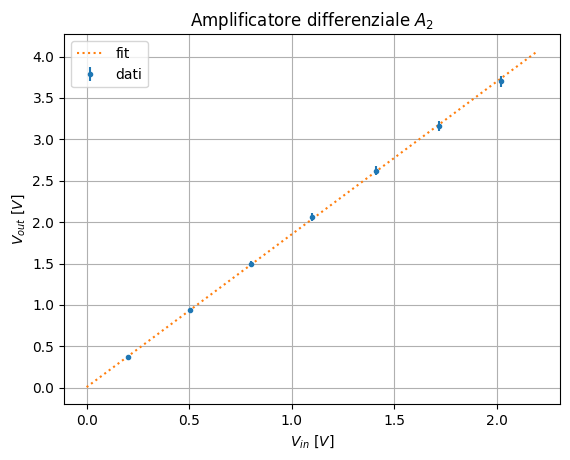

In [14]:
plt.errorbar(v_in_ni, v_out_ni, marker=".", linestyle="", yerr=err_v_out_ni, label="dati")
plt.grid()
plt.title("Amplificatore differenziale $A_2$")
plt.xlabel("$V_{in} \\ [V]$")
plt.ylabel("$V_{out} \\ [V]$")
plt.plot(np.linspace(0,2.2,30), retta_fit_xba(np.linspace(0,2.2,30), 1.8446749719727085, 0.007616704007424202), marker="", linestyle=":", label="fit")
plt.legend()

chi quadro 
 0.7593260961944563
NDOF  
 5


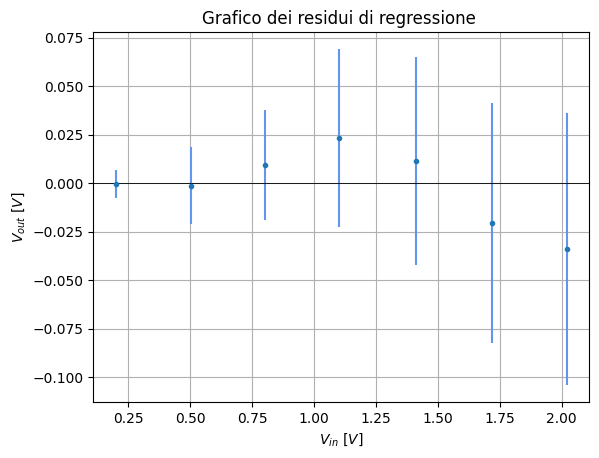

In [15]:
chi_quadro_lineare(v_out_ni, v_in_ni, err_v_out_ni, 0.007616704007424202, 1.8446749719727085, "$V_{out} \ [V]$", "$V_{in} \ [V]$", "")

In [16]:
#@title compatibilità tra il valore teorico e quello sperimentale
comp = -( 1.8330537082340677 - 1.8446749719727085 ) / math.sqrt( (0.0019030811587491705)**2 + (0.02018462174782327)**2 )
print(comp)

0.5732063044784252




---



**Amplificatore DELLE differenze**

In [ ]:
#misure in [V]
V_in_sin = 1.06
V_in_sin_err = 0.2
V_in_qua = 2.06
V_in_qua_err = 0.5
V_out = 5.48
V_out_err = 1

Simulazione

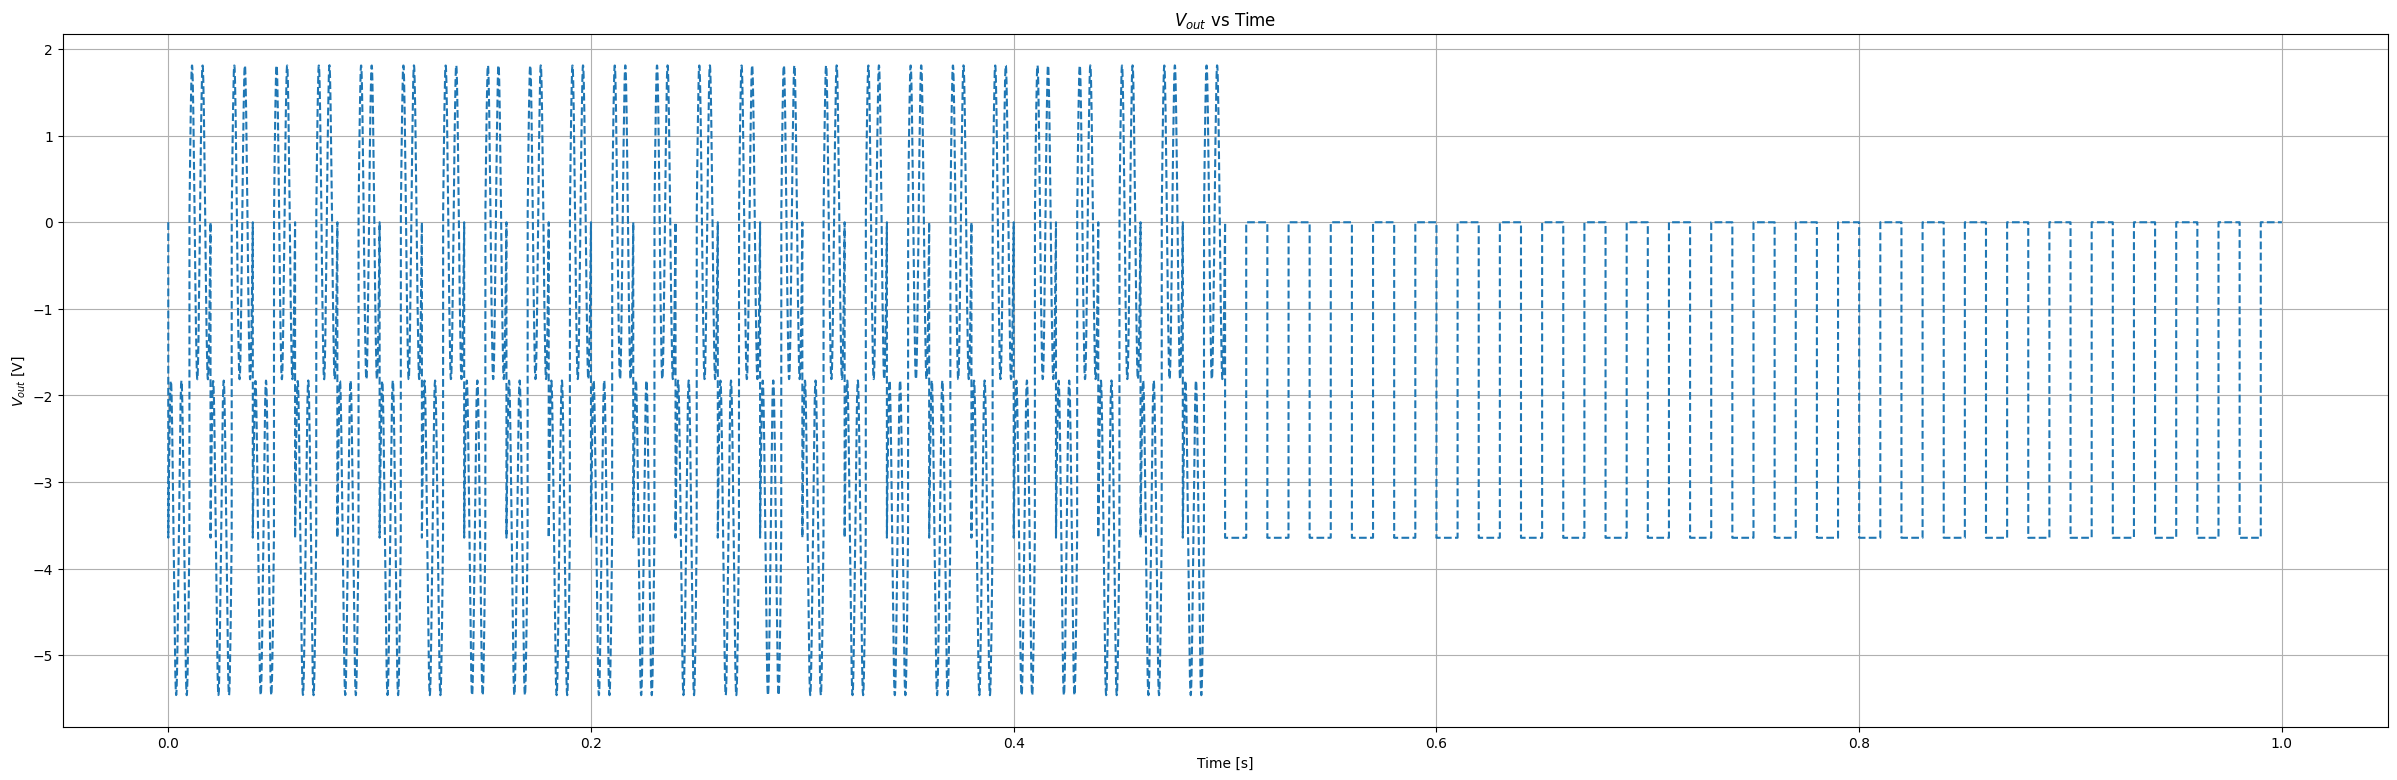

In [ ]:
time, vout, v2, v1 = np.loadtxt( "5 - differenziatore", skiprows=1, unpack=True)

plt.figure(figsize=(30,9))
plt.plot(time, vout, marker="", linestyle="--")
plt.ylabel("$V_{out}$ [V]")
plt.xlabel("Time [s]")
plt.title("$V_{out}$ vs Time")
plt.grid()



---



**Amplificatore di modo comune**

(L'analisi è stata svolta intuendo quale fosse il procedimento da seguire)

L'amplificazione di modo comune dal punto di vista teorica può essere calcolato applicando il principio di sovrapposizione, dopo alcuni passaggi algebrici, otteniamo che l'amplificazione di modo comine è data dalla somma algebrica delle amplificazioni del punto 1 e 4


In [25]:
print(1.8330537082340677-1.8327010157875414, "\pm", math.sqrt( (0.0019030811587491705)**2 + (0.0015779607518382516)**2 ) )

0.0003526924465262482 \pm 0.002472180824925237


In [26]:
#@title calcolo degli errori
err_v_in_ac = []
err_v_out_ac = []
for i in range(len(v_out_ac)):
  dummy = 0
  dummy = math.sqrt(1/3)* math.sqrt( ((1/10)*v_out_div_ac[i])**2 + ((3/100)*v_out_ac[i])**2)        #ipotesi uniforme
  err_v_out_ac.append(dummy)

for i in range(len(v_in_ac)):
  dummy = 0
  dummy = math.sqrt(1/3)* math.sqrt( ((1/10)*v_in_div_ac[i])**2 + ((3/100)*v_in_ac[i])**2 )         #ipotesi uniforme
  err_v_in_ac.append(dummy)

print("err_v_in_ac")
print( err_v_in_ac,"\n")
print("err_v_out_ac")
print(err_v_out_ac)

err_v_in_ac
[0.013610662486937708, 0.015768745458448283, 0.018036999011291577, 0.02038635164352203, 0.023776739333502675, 0.02701413210401795, 0.03002221399786054] 

err_v_out_ac
[0.00355715241918776, 0.004185789451624787, 0.005004211559609899, 0.00579338703465713, 0.006714412359494561, 0.00928726726940349, 0.009980146959505824]


In [27]:
#regressione lineare
regrlin_pear_errpost_xys(v_in_ac, v_out_ac, err_v_out_ac)

pendenza $b$	 0.29969007247976287
$\sigma_b$	 0.005963885859687738
intercetta $a$	 -0.005989961061715121
$\sigma_a$	 0.004919958930963869
Coefficiente di Pearson $\rho_{xy}$	 0.9995173197782699
$\sigma_{\rho_{xy}}$	 0.013893361459803933
Errore a posteriori $\delta$	 0.004365302531167366


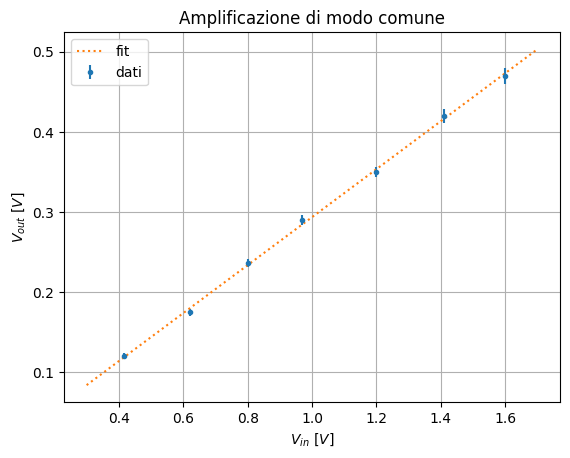

In [28]:
plt.errorbar(v_in_ac, v_out_ac, marker=".", linestyle="", yerr=err_v_out_ac, label="dati")
plt.grid()
plt.title("Amplificazione di modo comune")
plt.xlabel("$V_{in} \\ [V]$")
plt.ylabel("$V_{out} \\ [V]$")
plt.plot(np.linspace(0.3,1.7,30), retta_fit_xba(np.linspace(0.3,1.7,30), 0.29969007247976287, -0.005989961061715121), marker="", linestyle=":", label="fit")
plt.legend()

Se assumiamo come $b$ il fattore di amplificazione $A_c$ e guardiamo le slide sugli amplificatori operazionali alla pagina 79 allora vediamo che minore è il valore di $A_c$ meglio è il risultato dell'esperienza, in quanto si avvicina all'approsimazione teorica

Non ho trovato un modo teorico per poter calcolare questo valore di amplificazione

chi quadro 
 3.049973253091005
NDOF  
 5


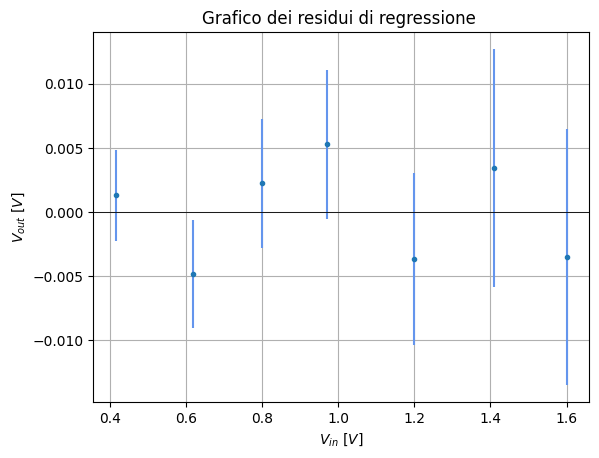

In [29]:
chi_quadro_lineare(v_out_ac, v_in_ac, err_v_out_ac, -0.005989961061715121, 0.29969007247976287, "$V_{out} \ [V]$", "$V_{in} \ [V]$", "")

In [30]:
#@title compatibilità tra il valore teorico e sperimentale
comp = (0.29969007247976287 - 0.0003526924465262482  ) / math.sqrt( (0.005963885859687738)**2 + (0.002472180824925237)**2 )
print(comp)

46.3659450768017




---



**Amplificatore ALLE differenze**

(Misura di $A_1$)

In questa configurazione l'amplificatore si comporta come un classico amplificatore invertente

$A_d = \frac{R_f}{R_1}$

In [18]:
#calcolo del guadagno teorico
g_teorico = R_f / R_1
err_gteorico = g_teorico * math.sqrt( (err_R_f/(R_f))**2 + (err_R_1/(R_1))**2 )
print(g_teorico, " \pm ", err_gteorico)
#contiene già l'informazione dell ipotesi uniforme

1.8327010157875414  \pm  0.0015779607518382516


In [20]:
#@title calcolo degli errori
err_v_in_ad = []
err_v_out_ad = []
for i in range(len(v_out_ad)):
  dummy = 0
  dummy = math.sqrt(1/3)* math.sqrt( ((1/10)*v_out_div_ad[i])**2 + ((3/100)*v_out_ad[i])**2)        #ipotesi uniforme
  err_v_out_ad.append(dummy)

for i in range(len(v_in_ad)):
  dummy = 0
  dummy = math.sqrt(1/3)* math.sqrt( ((1/10)*v_in_div_ad[i])**2 + ((3/100)*v_in_ad[i])**2 )         #ipotesi uniforme
  err_v_in_ad.append(dummy)

print("err_v_in_ad")
print( err_v_in_ad,"\n")
print("err_v_out_ad")
print(err_v_out_ad)

err_v_in_ad
[0.004509249752822894, 0.010523902951535298, 0.015075083194905869, 0.02227853974867593, 0.026857649437978245, 0.03162804662531869, 0.04535915931025765] 

err_v_out_ad
[0.007028750481652719, 0.019678753348048587, 0.028115001926610875, 0.04535915931025765, 0.053200125313135616, 0.0615728295056621, 0.06965639477702913]


In [21]:
#regressione lineare
regrlin_pear_errpost_xys(v_in_ad, v_out_ad, err_v_out_ad)

pendenza $b$	 1.829089432055526
$\sigma_b$	 0.020064063436133633
intercetta $a$	 0.003325187135138963
$\sigma_a$	 0.009059139846640604
Coefficiente di Pearson $\rho_{xy}$	 0.9998451334959377
$\sigma_{\rho_{xy}}$	 0.007870311613785779
Errore a posteriori $\delta$	 0.023073665457348527


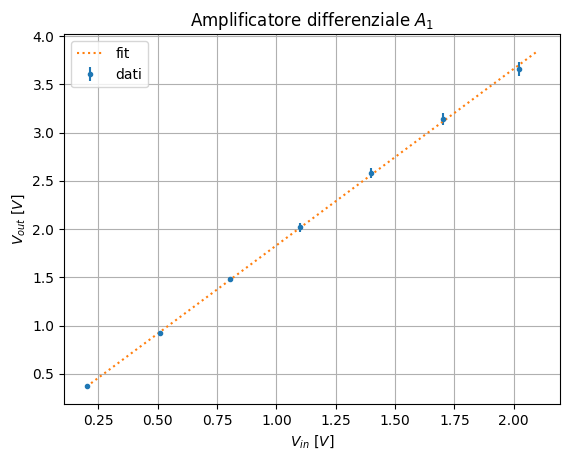

In [22]:
plt.errorbar(v_in_ad, v_out_ad, marker=".", linestyle="", yerr=err_v_out_ad, label="dati")
plt.grid()
plt.title("Amplificatore differenziale $A_1$")
plt.xlabel("$V_{in} \\ [V]$")
plt.ylabel("$V_{out} \\ [V]$")
plt.plot(np.linspace(0.2,2.1,30), retta_fit_xba(np.linspace(0.2,2.1,30), 1.829089432055526, 0.003325187135138963), marker="", linestyle=":", label="fit")
plt.legend()

chi quadro 
 1.0603270303522865
NDOF  
 5


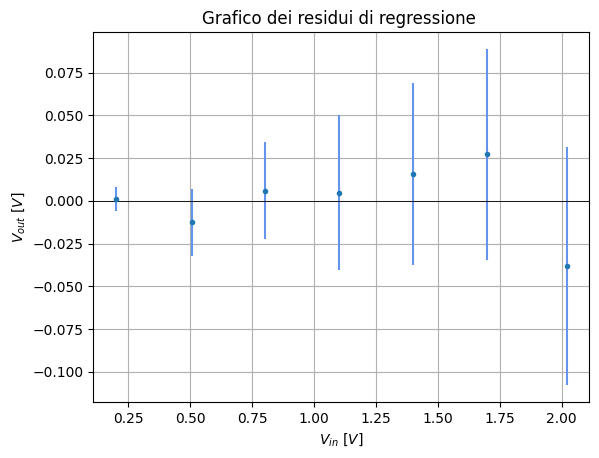

In [23]:
chi_quadro_lineare(v_out_ad, v_in_ad, err_v_out_ad, 0.003325187135138963, 1.829089432055526, "$V_{out} \ [V]$", "$V_{in} \ [V]$", "")

In [24]:
#@title compatibilità tra il valore sperimentale e quello teorico
comp = ( 1.8327010157875414 - 1.829089432055526 ) / math.sqrt( (0.020064063436133633)**2 + (0.0015779607518382516)**2 )
print(comp)

0.17944849929140708




---



**$A_D$ come media e calcolo di $CMRR$**

Nelle slide sugli amplificatori operazionali, alla pagina 79 troviamo la seguente formula:

$CMRR = 20*\log(\frac{| A_D |}{| A_C |})$

In [31]:
#@title cmrr sperimentale e A_d
ac = 0.29969007247976287
err_ac = 0.005963885859687738
ad_1 = 1.829089432055526
err_ad_1 = 0.020064063436133633
ad_2 = 1.8446749719727085
err_ad_2 = 0.02018462174782327

ad_mediato = (ad_1 + ad_2)/2
err_ad_mediato = math.sqrt( (0.5*err_ad_1)**2 + (0.5*err_ad_2)**2 )                                 #propagazione semplice
print("$A_D media$ \n", ad_mediato, " \pm " , err_ad_mediato)
cmrr = 20*math.log10( ad_mediato / ac )
err_cmrr = ( 20/((ad_mediato / ac)*math.log(10)) ) * ((ad_mediato / ac)*math.sqrt( (err_ad_mediato/ad_mediato)**2 + (err_ac/ac)**2 ))  #propagazione semplicie
print("$CMRR$ \n", cmrr, " \pm ", err_cmrr)

$A_D media$ 
 1.8368822020141171  \pm  0.014230122949854427
$CMRR$ 
 15.748178988599566  \pm  0.18548622995695419


In [34]:
#@title cmrr teorico e A_d
ac = 0.0003526924465262482
err_ac = 0.002472180824925237
ad_1 = 1.8327010157875414
err_ad_1 = 0.0015779607518382516
ad_2 = 1.8330537082340677
err_ad_2 = 0.0019030811587491705

ad_mediato = (ad_1 + ad_2)/2
err_ad_mediato = math.sqrt( (0.5*err_ad_1)**2 + (0.5*err_ad_2)**2 )                                 #propagazione semplice
print("$A_D media$ \n", ad_mediato, " \pm " , err_ad_mediato)
cmrr = 20*math.log10( ad_mediato / ac )
err_cmrr = ( 20/((ad_mediato / ac)*math.log(10)) ) * ((ad_mediato / ac)*math.sqrt( (err_ad_mediato/ad_mediato)**2 + (err_ac/ac)**2 ))  #propagazione semplice
print("$CMRR$ \n", cmrr, " \pm ", err_cmrr)

$A_D media$ 
 1.8328773620108045  \pm  0.0012360904124626185
$CMRR$ 
 74.31474497192906  \pm  60.883328014313506


non so cosa sia successo per avere un errore di 60

In [33]:
#@title compatibilità

print("a_d mediato")
print( ( (1.8328773620108045   - 1.8368822020141171  ) / math.sqrt( (0.0012360904124626185)**2 + (0.014230122949854427)**2 ) ) )
print("\ncmrr")
print( ( (74.31474497192906   - 15.748178988599566  ) / math.sqrt( (60.883328014313506)**2 + (0.18548622995695419)**2 ) ) )

a_d mediato
-0.28037817348772326

cmrr
0.9619430490625844


#Librerie

In [2]:
def regrlin_pear_errpost_xys(input_x, input_y, input_sigma) :
  import math
  import sys
  #dati input
  x = list(input_x)
  y = list(input_y)
  sigma = list(input_sigma)
  dimensione = len(x)
  if len(x) != len(y):
    print("X E Y DIMENSIONE DIVERSA")
    sys.exit()
  if len(x) != len(sigma):
    print("X E SIGMA DIMENSIONE DIVERSA")
    sys.exit()
  #REGRESSIOBNE LINEARE
  #calcolo del delta
  parametro_1 = 0
  parametro_2 = 0
  parametro_3 = 0
  for i in range(dimensione): #primo termine del delta
    dummy_1 = 0
    dummy_1 = 1/ pow(sigma[i],2)
    parametro_1 = dummy_1 + parametro_1
  for i in range(dimensione): #secondo termine del delta
    dummy_2 = 0
    dummy_2 = pow(x[i],2) / pow(sigma[i],2)
    parametro_2 = dummy_2 + parametro_2
  dummy_3_1 = 0
  for i in range(dimensione): #terzo termine del delta
    dummy_3 = 0
    dummy_3 = x[i] / pow(sigma[i],2)
    dummy_3_1 = dummy_3 + dummy_3_1
  parametro_3 = pow(dummy_3_1,2)
  delta = (parametro_1*parametro_2) - parametro_3
  delta_1 = 1/delta
  #calcolo di b
  parametro_4 = 0
  parametro_5 = 0
  parametro_6 = 0
  parametro_7 = 0
  for i in range(dimensione): #calcolo del primo termine di a
    dummy_4 = 0
    dummy_4 = 1/pow(sigma[i],2)
    parametro_4 = dummy_4 + parametro_4
  for i in range(dimensione): #calcolo del secondo termine di a
    dummy_5 = 0
    dummy_5 = (x[i]*y[i]) / pow(sigma[i],2)
    parametro_5 = dummy_5 + parametro_5
  for i in range(dimensione): #calcolo del terzo termine di a
    dummy_6 = 0
    dummy_6 = x[i] / pow(sigma[i],2)
    parametro_6 = dummy_6 + parametro_6
  for i in range(dimensione): #calcolo del quarto termine di a
    dummy_7 = 0
    dummy_7 = y[i] / pow(sigma[i],2)
    parametro_7 = dummy_7 + parametro_7
  dummy_b1 = delta_1*parametro_4*parametro_5
  dummy_b2 = delta_1*parametro_6*parametro_7
  b = dummy_b1-dummy_b2
	#calcolo di a
  parametro_8 = parametro_2
  parametro_9 = parametro_7
  parametro_10 = parametro_6
  parametro_11 = parametro_5
  dummy_a1 = delta_1*parametro_8*parametro_9
  dummy_a2 = delta_1*parametro_10*parametro_11
  a = dummy_a1-dummy_a2
  #calcolo incertezza e covarianza
  #sigma b
  sigma_b = math.sqrt(delta_1*parametro_1)
  #sigma a
  sigma_a = math.sqrt(delta_1*parametro_8)
  #covrianza
  #al mmento non disponibile
  #COEFFICIENTE DI CORRELLAZIONE DI PEARSON
  media_x = sum(x) / dimensione
  media_y = sum(y) / dimensione
  numeratore = 0
  denominatore = 0
  dummy_denx = 0
  dummy_deny = 0
  for i in range(dimensione):
    dummy_x = x[i]-media_x
    dummy_y = y[i]-media_y
    dummy_numeratore = dummy_x*dummy_y
    numeratore = dummy_numeratore + numeratore
    dummy_x2 = pow(dummy_x,2)
    dummy_y2 = pow(dummy_y,2)
    dummy_denx = dummy_x2 + dummy_denx
    dummy_deny = dummy_y2 + dummy_deny
  dummy_denominatore = dummy_denx * dummy_deny
  denominatore = math.sqrt(dummy_denominatore)
  rxy = numeratore / denominatore
  numeratore_sigma = 1 - pow(rxy,2)
  denominatore_sigma = dimensione - 2
  sigma_rxy = math.sqrt(numeratore_sigma/denominatore_sigma)
  #ERRORE A POSTERIORI
  parametro_12 = 1 / (dimensione - 2)
  y_riferimento = []
  for i in range(dimensione):
    dummy_y = 0
    dummy_y = a + (b*x[i])
    y_riferimento.append(dummy_y)
  scarti_quadrati = 0
  for i in range(dimensione):
    dummy_sq = y[i] - y_riferimento[i]
    dummy_sq2 = pow(dummy_sq,2)
    scarti_quadrati = dummy_sq2 + scarti_quadrati
  errore_posteriori = math.sqrt(parametro_12*scarti_quadrati)
  #print dei risultati
  print("pendenza $b$\t", b)
  print("$\sigma_b$\t", sigma_b)
  print("intercetta $a$\t", a)
  print("$\sigma_a$\t", sigma_a)
  #print("covarianza", )
  print("Coefficiente di Pearson $\\rho_{xy}$\t",  rxy)
  print("$\sigma_{\\rho_{xy}}$\t", sigma_rxy)
  print("Errore a posteriori $\delta$\t",  errore_posteriori)

In [3]:
def retta_fit_xba(x, b,a):
  y = []
  for i in range(len(x)):
    dummy = 0
    dummy = (x[i]*b) + a
    y.append(dummy)
  return y

In [4]:
def chi_quadro_lineare(y_vec, x_vec, sigma_vec, inte, pend, stringa_ytitle, stringa_xtitle, stringa_titolo):

	import math
	import matplotlib.pyplot as plt

#La formula della retta utilizzata è: y = a + bx
#dati
	y = list(y_vec)
	x = list(x_vec)
	sigma = list(sigma_vec)
	intercetta = inte
	pendenza = pend
	dimensione = len(y)

#calcolo del riferimento
	y_ref = []
	for i in x:
		dummy_1 = 0
		dummy_1 = (i*pendenza) + intercetta
		y_ref.append(dummy_1)

#calcolo del chi quadro
	vettore_scarti_quadratici = []
	vettore_scarti = []
	for i in range(dimensione):
		dummy_2 = 0
		dummy_3 = 0
		dummy_4 = 0
		dummy_2 = y[i] - y_ref[i]
		dummy_3 = dummy_2 / sigma[i]
		dummy_4 = dummy_3**2
		vettore_scarti_quadratici.append(dummy_4)
		vettore_scarti.append(dummy_2)

	chi_quadro = sum(vettore_scarti_quadratici)
	print("chi quadro \n", chi_quadro)
	print("NDOF  \n", dimensione-2)

#print del grafico degli scarti
	ascisse = x

	plt.errorbar(ascisse, vettore_scarti, marker=".", linestyle="none", yerr=sigma, ecolor="cornflowerblue")
	plt.title("Grafico dei residui di regressione " + stringa_titolo )
	plt.ylabel(stringa_ytitle)
	plt.xlabel(stringa_xtitle)
	plt.axhline(0, color='black', linewidth="0.6")
	plt.grid()